# 💧 Workshop de Análise de Dados de Saneamento na Região Amazônica

Neste notebook, vamos analisar dados públicos sobre saneamento básico em municípios da região amazônica brasileira. Exploraremos os dados com gráficos e mapas interativos usando Pydeck.


In [1]:
!pip install pydeck geopandas matplotlib seaborn pandas


[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [2]:
import pandas as pd

df = pd.read_csv("cities8.csv")
df.head()

,Cidade,Estado,ID,Latitude,Longitude,Amazonia,Parcela da população sem acesso à água,Parcela da população com acesso à água,População com acesso à água,População sem acesso à água,...,Extensão da rede de esgoto,"Investimentos totais, em R$ de 2022","Investimentos per capita, em R$ de 2022",Despesas per capita com saneamento,Tarifa de água,Tarifa de coleta de esgoto,Densidade demográfica,Densidade domiciliar,População,Área do município
0,Cruzeiro do Sul,Acre,120020,-7.636248,-72.669165,Sim,0.493,0.507,46566.0,45322.0,...,NaN,500852.88,5.45,57.63,2.63,NaN,10.47,3.44,91888.0,8779.403
1,Rio Branco,Acre,120040,-9.976536,-67.822078,Sim,0.465,0.535,195152.0,169604.0,...,594.36,0.00,0.00,135.97,2.94,3.22,41.29,2.94,364756.0,8834.942
2,Arapiraca,Alagoas,270030,-9.754866,-36.661471,Não,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Barra de Santo Antônio,Alagoas,270050,-9.403810,-35.511769,Não,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Barra de São Miguel,Alagoas,270060,-9.826136,-35.883778,Não,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.info()
df.describe()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 839 entries, 0 to 838
Data columns (total 54 columns):
 #   Column                                                              Non-Null Count  Dtype  
---  ------                                                              --------------  -----  
 0   Cidade                                                              839 non-null    object 
 1   Estado                                                              839 non-null    object 
 2   ID                                                                  839 non-null    int64  
 3   Latitude                                                            839 non-null    float64
 4   Longitude                                                           839 non-null    float64
 5   Amazonia                                                            839 non-null    object 
 6   Parcela da população sem acesso à água                              115 non-null    float64
 7   Parcela da popula

Index(['Cidade', 'Estado', 'ID', 'Latitude', 'Longitude', 'Amazonia',
       'Parcela da população sem acesso à água',
       'Parcela da população com acesso à água', 'População com acesso à água',
       'População sem acesso à água',
       'Parcela da população sem coleta de esgoto',
       'Parcela da população com coleta de esgoto',
       'População com coleta de esgoto', 'População sem coleta de esgoto',
       'Parcela das moradias sem banheiro',
       'Parcela das moradias com banheiro', 'Moradias com banheiro',
       'Moradias sem banheiro',
       'Percentagem da população branca sem acesso à água',
       'Percentagem da população preta sem acesso à água',
       'Percentagem da população amarela sem acesso à água',
       'Percentagem da população parda sem acesso à água',
       'Percentagem da população indígena sem acesso à água',
       'Percentagem da população branca sem acesso à coleta de esgoto',
       'Percentagem da população preta sem acesso à coleta de esgo

In [4]:
df_amazonia = df[df['Amazonia'] == 'Sim'].copy()
df_amazonia.shape
df_amazonia.head()

,Cidade,Estado,ID,Latitude,Longitude,Amazonia,Parcela da população sem acesso à água,Parcela da população com acesso à água,População com acesso à água,População sem acesso à água,...,Extensão da rede de esgoto,"Investimentos totais, em R$ de 2022","Investimentos per capita, em R$ de 2022",Despesas per capita com saneamento,Tarifa de água,Tarifa de coleta de esgoto,Densidade demográfica,Densidade domiciliar,População,Área do município
0,Cruzeiro do Sul,Acre,120020,-7.636248,-72.669165,Sim,0.493,0.507,46566.0,45322.0,...,NaN,500852.88,5.45,57.63,2.63,NaN,10.47,3.44,91888.0,8779.403
1,Rio Branco,Acre,120040,-9.976536,-67.822078,Sim,0.465,0.535,195152.0,169604.0,...,594.36,0.00,0.00,135.97,2.94,3.22,41.29,2.94,364756.0,8834.942
21,Macapá,Amapá,160030,0.040153,-51.056959,Sim,0.456,0.544,240857.0,202076.0,...,344.70,46896195.45,105.88,133.14,3.33,4.93,68.11,3.59,442933.0,6503.458
22,Santana,Amapá,160060,-0.030707,-51.178967,Sim,0.549,0.451,48518.0,59100.0,...,9.42,7629950.22,70.90,86.21,2.45,2.97,69.83,3.74,107618.0,1541.224
23,Careiro da Várzea,Amazonas,130115,-3.197024,-59.825910,Sim,0.972,0.028,549.0,19088.0,...,NaN,0.00,0.00,15.77,0.56,NaN,7.47,3.40,19637.0,2627.474


In [5]:
import pydeck as pdk

df_mapa = df_amazonia[
    ['Cidade', 'Latitude', 'Longitude', 'Parcela da população com acesso à água']
].dropna()

layer = pdk.Layer(
    "ScatterplotLayer",
    data=df_mapa,
    get_position='[Longitude, Latitude]',
    get_fill_color='[255, 100 * Parcela da população com acesso à água, 100, 180]',
    get_radius=10000,
    pickable=True
)

view_state = pdk.ViewState(latitude=-4.5, longitude=-60, zoom=4.2)

deck = pdk.Deck(
    layers=[layer],
    initial_view_state=view_state,
    tooltip={"text": "{Cidade}\nAcesso à água: {Parcela da população com acesso à água}%"}
)

deck.show()

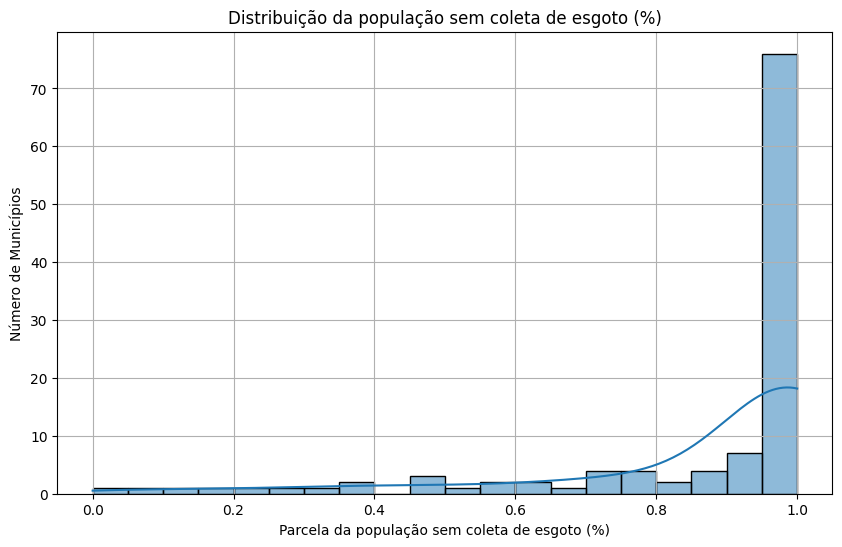

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df_amazonia['Parcela da população sem coleta de esgoto'], bins=20, kde=True)
plt.title('Distribuição da população sem coleta de esgoto (%)')
plt.xlabel('Parcela da população sem coleta de esgoto (%)')
plt.ylabel('Número de Municípios')
plt.grid(True)
plt.show()

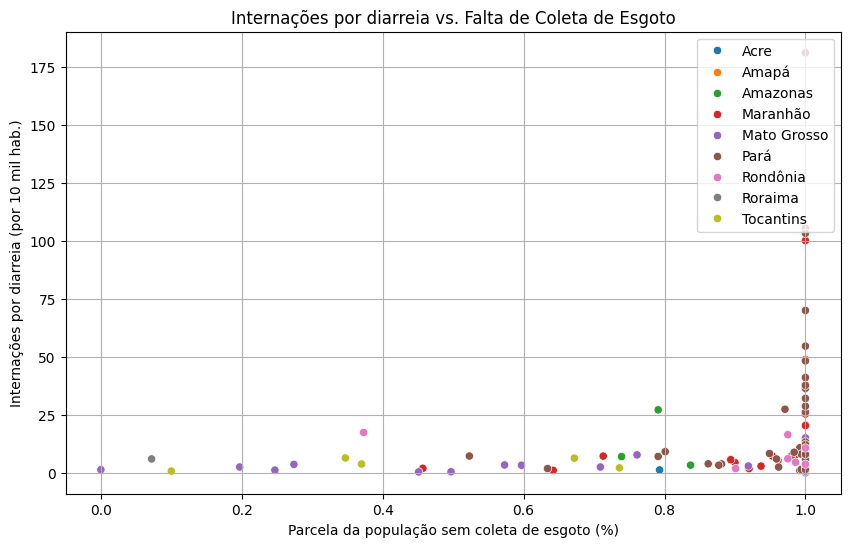

In [8]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_amazonia,
    x='Parcela da população sem coleta de esgoto',
    y='Incidência de internações por diarreia',
    hue='Estado'
)
plt.title('Internações por diarreia vs. Falta de Coleta de Esgoto')
plt.xlabel('Parcela da população sem coleta de esgoto (%)')
plt.ylabel('Internações por diarreia (por 10 mil hab.)')
plt.legend(loc='upper right')
plt.grid(True)


## ✅ Correção nas Visualizações Pydeck

Nesta versão, o `get_fill_color` foi corrigido para evitar erros ao aplicar escala de cores personalizada. A cor agora é atribuída via função inline, conforme boas práticas documentadas.


In [ ]:

import pydeck as pdk

# Visualização 3D: Acesso à água vs internações por diarreia (com correção)

df_plot = df.copy()
df_plot = df_plot.dropna(subset=["Latitude", "Longitude", "Parcela da população com acesso à água", "Incidência de internações por diarreia"])


layer = pdk.Layer(
    "ColumnLayer",
    data=df_plot,
    get_position='[Longitude, Latitude]',
    get_elevation="`Incidência de internações por diarreia` * 100",
    elevation_scale=1,
    radius=3000,
    get_fill_color="[255, 255, 100, 180]",
    pickable=True,
    auto_highlight=True,
)

view_state = pdk.ViewState(
    longitude=df_plot["Longitude"].mean(),
    latitude=df_plot["Latitude"].mean(),
    zoom=4,
    pitch=45,
)

r = pdk.Deck(layers=[layer], initial_view_state=view_state, tooltip={"text": "Cidade: {Cidade}\nAcesso à água: {Parcela da população com acesso à água}%\nInternações por diarreia: {Incidência de internações por diarreia}"})
r.show()


In [10]:

# Exemplo de visualização 3D: Coleta de esgoto vs densidade demográfica

df_plot = df.copy()
df_plot = df_plot.dropna(subset=["Latitude", "Longitude", "Parcela da população com coleta de esgoto", "Densidade demográfica"])

layer = pdk.Layer(
    "ColumnLayer",
    data=df_plot,
    get_position='[Longitude, Latitude]',
    get_elevation="`Densidade demográfica` * 10",
    elevation_scale=1,
    radius=3000,
    get_fill_color="[255 - `Parcela da população com coleta de esgoto` * 2, `Parcela da população com coleta de esgoto` * 2, 120]",
    pickable=True,
    auto_highlight=True,
)

view_state = pdk.ViewState(
    longitude=df_plot["Longitude"].mean(),
    latitude=df_plot["Latitude"].mean(),
    zoom=4,
    pitch=50,
)

r = pdk.Deck(layers=[layer], initial_view_state=view_state, tooltip={"text": "Cidade: {Cidade}\nColeta de esgoto: {Parcela da população com coleta de esgoto}%\nDensidade demográfica: {Densidade demográfica}"})
r.show()


## 🔍 Atividade

Escolha uma variável que você acha relevante para a qualidade do saneamento básico (ex: **Moradias sem banheiro**, **Perdas na distribuição**, **Tarifa de água**) e:

1. Crie um gráfico com `seaborn` ou `matplotlib` para analisar sua distribuição.
2. Crie um mapa com `pydeck` para visualizar espacialmente essa variável.
3. Compartilhe com os colegas suas descobertas.
